<a href="https://colab.research.google.com/github/Divide-y-Venceras-la-Complejidad/Complejidad-Algoritmica/blob/trabajo-parcial/Intento_2_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ponderación = Genero + artista + bailabilidad + energia de la musica + 

In [1]:
%%file dataset.csv
id, name, genero, artista,  topico, año
1, Lala, Regeton, MyKeTowers, verano, 2023
2, Adan y Eva, Urbano, Paulo Londra, Tristeza, 2020 
3, Necesito otro beso, Pop, Rosalia, Trizteza, 2023
4, Todo de ti, Urbano, Pop, Alegria, 2022
5, Caprichoso, Urbano, Pop, Tristeza, 2023
6, TQG, Trap, Karol G, Despecho, 2023
7, Chulo, Urbano, Bad Bunny, Despecho, 2023
8, Charapita, Cumbia, Los Yenis, Tristeza, 2007
9, El idiota, Cumbia, Principe Acollino, Tristeza, 2009
10, Detective, Regeton, MykeTowers, verano, 2019

Writing dataset.csv


In [2]:
class Music:
  def __init__(self, id, name, genero, artista, topico, year):
    self.id = id
    self.name = name
    self.genero = genero
    self.artista = artista
    self.topico = topico
    self.year = year

In [39]:
lst = []
with open("datasettp21datos.csv") as f:
  line1 = f.readline()
  for line in f:
    line = line.split(";")
    music = Music(line[0], line[1], line[2], line[3], line[4], line[5])
    lst.append(music)

In [ ]:
for i in lst:
  print(i.year)

In [41]:
arch = open("matriz.txt", "w")
 

for i in lst:
  for j in lst:
    point = 0
    ge = 0 
    to = 0 
    ar = 0 
    anio = 0 
    if i.id != j.id: 
      if i.genero == j.genero:
        ge = 1*0.60
        anio = (int(i.year)*(1/int(j.year)))*0.05
      if i.topico == j.topico:
        to = 1*0.20
      if i.artista == j.artista:
        ar = 1*0.15
      if ge + to == 0:
        anio = 0
    point = round(ge + to + ar + anio, 4)
    arch.write(f"{point} ")
  arch.write("\n")
arch.close()

In [42]:
with open("matriz.txt") as fil:
  for line in fil:
    print(line)

0 0.65 0.65 0 0 0 0 0 0 0.2 0 0 0 0 0 0.2 0 0 0 0 0 

0.65 0 0.65 0 0 0 0 0 0 0 0 0 0 0 0.2 0 0 0.15 0 0 0 

0.65 0.65 0 0 0.2 0 0 0.2 0 0 0 0.2 0 0 0 0 0 0.2 0.2 0 0 

0 0 0 0 0.8 1.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0.2 0.8 0 0.8 0 0.2 0 0 0 0.2 0 0 0 0 0 0.2 0.2 0 0 

0 0 0 1.0 0.8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0.65 0.85 0 0 0 0.2 0 0 0 0.2 0 0 0.2 0.2 

0 0 0.2 0 0.2 0 0.65 0 0.8 0 0 0.2 0 0 0 0 0 0.2 0.2 0 0 

0 0 0 0 0 0 0.85 0.8 0 0 0 0 0.2 0 0 0 0.2 0 0 0.2 0.2 

0.2 0 0 0 0 0 0 0 0 0 0.8 0.65 0 0 0 0.2 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0.8 0 0.65 0 0.2 0 0 0 0 0 0 0 

0 0 0.2 0 0.2 0 0 0.2 0 0.65 0.65 0 0 0 0 0 0 0.2 0.2 0 0 

0 0 0 0 0 0 0.2 0 0.2 0 0 0 0 0.8 0.65 0 0.2 0 0 0.2 0.2 

0 0 0 0 0 0 0 0 0 0 0.2 0 0.8 0 0.65 0 0 0 0 0 0 

0 0.2 0 0 0 0 0 0 0 0 0 0 0.65 0.65 0 0 0 0 0 0 0 

0.2 0 0 0 0 0 0 0 0 0.2 0 0 0 0 0 0 0.8 0.65 0 0 0 

0 0 0 0 0 0 0.2 0 0.2 0 0 0 0.2 0 0 0.8 0 0.65 0 0.2 0.2 

0 0.15 0.2 0 0.2 0 0 0.2 0 0 0 0.2 0 0 0 0.65 0.65 0 0.2 0 0 

0 

In [43]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [44]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v in range(n):
        if G[u, v] > 0 and not visited[v]:
          f = g + G[u, v]
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [45]:
G = np.loadtxt("matriz.txt")
print(G)

[[0.   0.65 0.65 0.   0.   0.   0.   0.   0.   0.2  0.   0.   0.   0.
  0.   0.2  0.   0.   0.   0.   0.  ]
 [0.65 0.   0.65 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.2  0.   0.   0.15 0.   0.   0.  ]
 [0.65 0.65 0.   0.   0.2  0.   0.   0.2  0.   0.   0.   0.2  0.   0.
  0.   0.   0.   0.2  0.2  0.   0.  ]
 [0.   0.   0.   0.   0.8  1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.2  0.8  0.   0.8  0.   0.2  0.   0.   0.   0.2  0.   0.
  0.   0.   0.   0.2  0.2  0.   0.  ]
 [0.   0.   0.   1.   0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.65 0.85 0.   0.   0.   0.2  0.
  0.   0.   0.2  0.   0.   0.2  0.2 ]
 [0.   0.   0.2  0.   0.2  0.   0.65 0.   0.8  0.   0.   0.2  0.   0.
  0.   0.   0.   0.2  0.2  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.85 0.8  0.   0.   0.   0.   0.2  0.
  0.   0.   0.2  0.   0.   0.2  0.2 ]
 [0.2  0.   0.   0.   0.   0

In [46]:
def drawG_am(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        graph.edge(str(u), str(v), str(G[u, v]), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in range(n):
      draw = False
      if G[u, v] > 0 and not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(G[u, v]))
        else:
          graph.edge(str(u), str(v))
  return graph

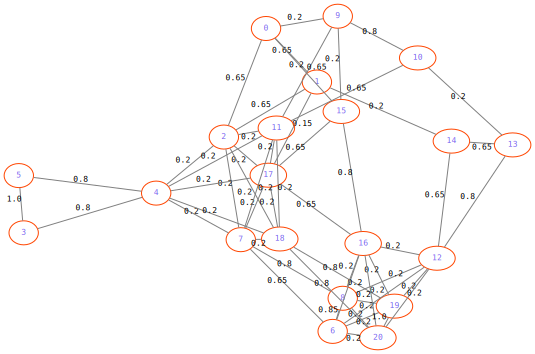

In [47]:
drawG_am(G, weighted=True)